## Imports ##

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
from PIL import Image, ImageOps, ImageEnhance
from sklearn.model_selection import cross_val_score
import kagglehub

# Download latest version
path = kagglehub.dataset_download("datamunge/sign-language-mnist")
print("Path to dataset files:", path)


C:\Users\pedro\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\pedro\.cache\kagglehub\datasets\datamunge\sign-language-mnist\versions\1


In [2]:
data_train = pd.read_csv(path + "/sign_mnist_train.csv")
data_test = pd.read_csv(path + "/sign_mnist_test.csv")

# Separate the data_train into X and y
X_train = data_train.drop('label', axis=1)
y_train = data_train['label']

# Separate the data_test into X and y
X_test = data_test.drop('label', axis=1)
y_test = data_test['label']


Accuracy: 18.61%
F1-Score: 0.15638030142372522
Train Accuracy: 34.52%


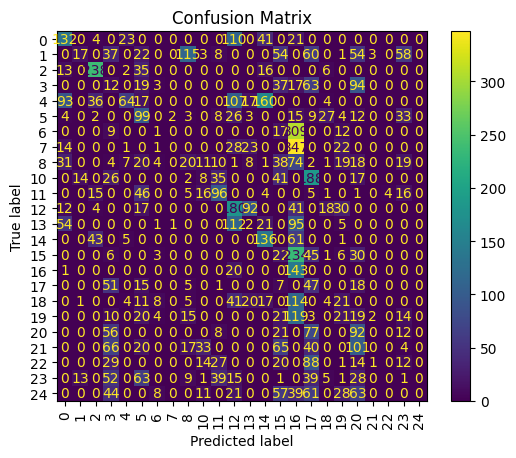

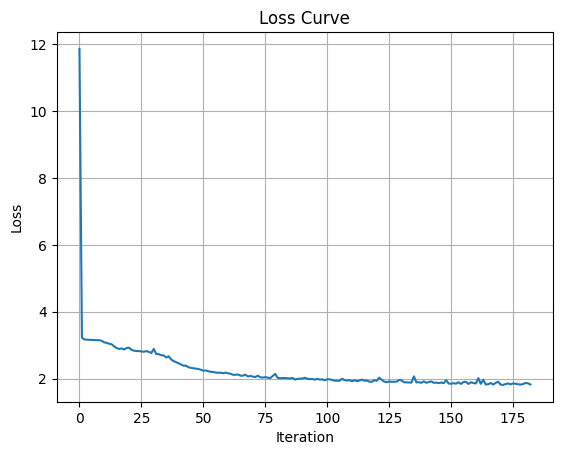

In [53]:
model1 = MLPClassifier(
    hidden_layer_sizes=(100,),
    activation='relu',
    solver='adam',
    max_iter=300
)
    
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
f1_macro = f1_score(y_test, y_pred, average='macro')
print(f"F1-Score: {f1_macro}")

y_train_pred = model1.predict(X_train)

train_accuracy = accuracy_score(y_train, y_train_pred) * 100
print(f"Train Accuracy: {train_accuracy:.2f}%")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model1.classes_)
disp.plot(cmap='viridis', xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()

plt.plot(model1.loss_curve_)
plt.title("Loss Curve")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid()
plt.show()

In [54]:
# Normalize pixel values to [0, 1]
X_train = X_train / 255.0  
X_test = X_test / 255.0

Accuracy: 77.96%
F1-Score: 0.7577021972936876
Train Accuracy: 100.00%


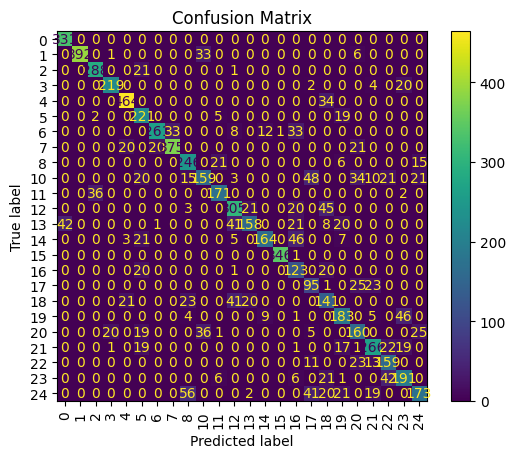

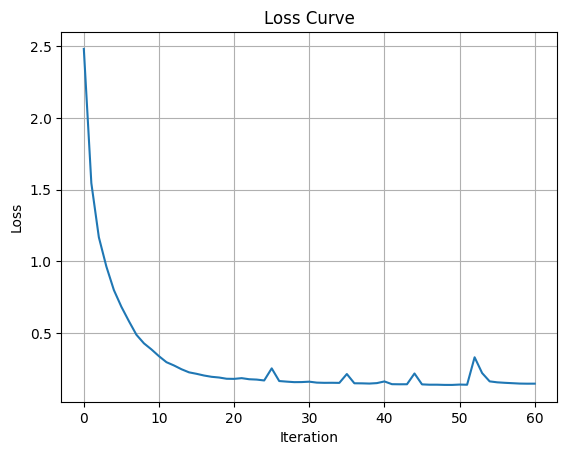

In [55]:
model1n = MLPClassifier(
    hidden_layer_sizes=(256,128),
    activation='relu',
    solver='adam',
    alpha=0.1,
    max_iter=300
)
    
model1n.fit(X_train, y_train)
y_pred = model1n.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
f1_macro = f1_score(y_test, y_pred, average='macro')
print(f"F1-Score: {f1_macro}")

y_train_pred = model1n.predict(X_train)

train_accuracy = accuracy_score(y_train, y_train_pred) * 100
print(f"Train Accuracy: {train_accuracy:.2f}%")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model1n.classes_)
disp.plot(cmap='viridis', xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()

plt.plot(model1n.loss_curve_)
plt.title("Loss Curve")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid()
plt.show()


Accuracy: 77.86%
F1-Score: 0.7559347639970527
Train Accuracy: 99.99%


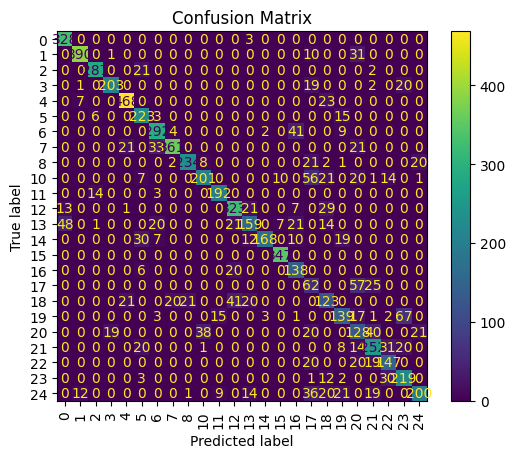

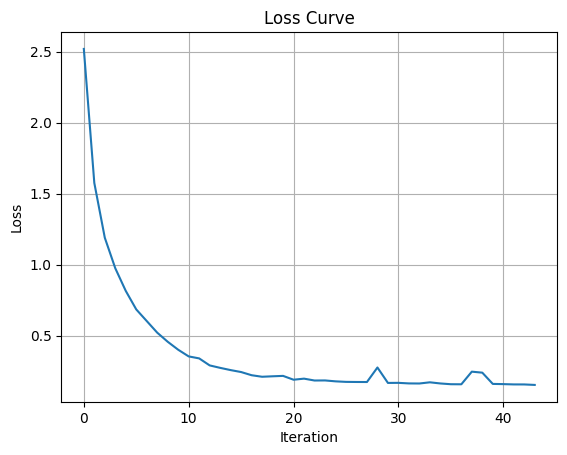

In [83]:

model2 = MLPClassifier(
    max_iter=300,
    activation='relu',
    solver='adam',
    hidden_layer_sizes=(256, 128),
    alpha=0.1,
    early_stopping=True,
)

model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

f1_macro = f1_score(y_test, y_pred, average='macro')
print(f"F1-Score: {f1_macro}")

y_train_pred = model2.predict(X_train)

train_accuracy = accuracy_score(y_train, y_train_pred) * 100
print(f"Train Accuracy: {train_accuracy:.2f}%")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model2.classes_)
disp.plot(cmap='viridis', xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()

plt.plot(model2.loss_curve_)
plt.title("Loss Curve")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid()
plt.show()

Accuracy: 99.48%
F1-Score: 0.9949138414407757


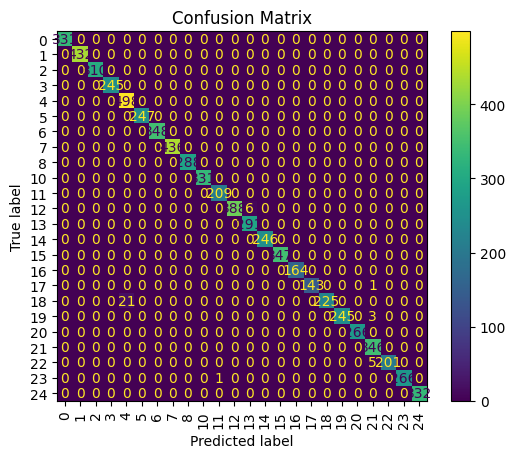

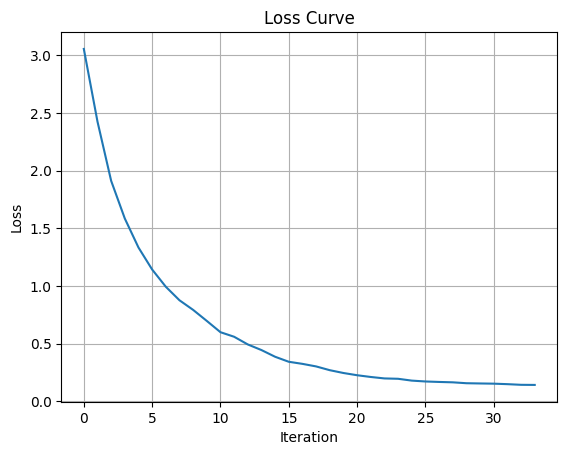

In [ ]:
# Augment dataset

def augment_images(X, y):
    X_augmented = X_test
    y_augmented = y_test
    for img, label in zip(X.values, y.values):
        # Reshape row to 28x28 image
        img = Image.fromarray(img.reshape(28, 28).astype('uint8'))
        

        brighter = ImageEnhance.Brightness(img).enhance(np.random.uniform(0.8, 1.2))
        X_augmented.add(np.array(brighter).reshape(1, -1))
        y_augmented.add(label)
        
        contrast = ImageEnhance.Contrast(img).enhance(np.random.uniform(0.8, 1.2))
        X_augmented.add(np.array(contrast).reshape(1, -1))
        y_augmented.add(label)

        cropped = img.transform(
            img.size,
            Image.AFFINE,
            (1, np.random.uniform(-0.1, 0.1), 0, 0, 1, 0)
        )
        X_augmented.add(np.array(cropped).reshape(1, -1))
        y_augmented.add(label)

        

    return X_augmented, y_augmented


# Apply augmentations to training data
X_train_augmented, y_train_augmented = augment_images(X_train, y_train)

model3 = MLPClassifier(
    max_iter=300,
    activation='relu',
    solver='adam',
    hidden_layer_sizes=(256,128),
    alpha=0.1,
    learning_rate_init=0.0001,
    early_stopping=True,
)

model3.fit(X_train_augmented, y_train_augmented)
y_pred = model3.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

f1_macro = f1_score(y_test, y_pred, average='macro')
print(f"F1-Score: {f1_macro}")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model3.classes_)
disp.plot(cmap='viridis', xticks_rotation='vertical')

plt.title("Confusion Matrix")
plt.show()

plt.plot(model3.loss_curve_)
plt.title("Loss Curve")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid()
plt.show()

Accuracy: 99.48%
F1-Score: 0.9949138414407757


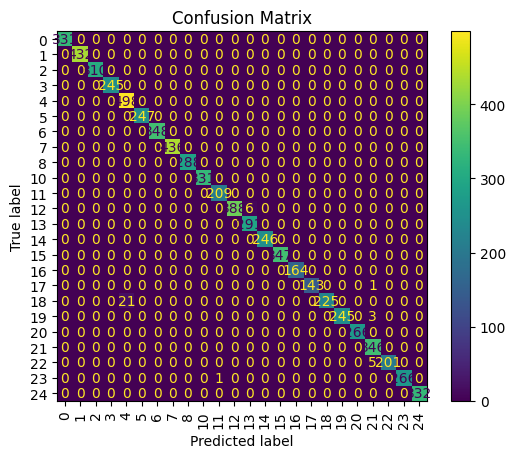

Cross-Validation Accuracy: 0.9983267485992254


In [ ]:
X_test_augmented, y_test_augmented = augment_images(X_test, y_test)
y_pred = model3.predict(X_test_augmented)

accuracy = accuracy_score(y_test_augmented, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

f1_macro = f1_score(y_test_augmented, y_pred, average='macro')
print(f"F1-Score: {f1_macro}")

cm = confusion_matrix(y_test_augmented, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model3.classes_)
disp.plot(cmap='viridis', xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()


scores = cross_val_score(model2, X_train_augmented, y_train_augmented, cv=5)
print("Cross-Validation Accuracy:", np.mean(scores))